In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from __future__ import print_function
from scipy.misc import imread
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append('..')
from deepcalcium.datasets.nf import nf_load_hdf5
from deepcalcium.utils.visuals import mask_outlines
print('Done')

Done


In [4]:
# How many frames, neurons in the neurofinder dataset.
S, M = nf_load_hdf5('all_train')
nb_frames = sum([s.get('s').shape[0] for s in S])
nb_neurons = sum([m.get('m').shape[0] for m in M])
print('Training: %d frames, %d neurons.' % (nb_frames, nb_neurons))
for s, m in zip(S, M):
    s.close(); m.close()

Training: 66017 frames, 6974 neurons.


In [3]:
# Quantify class-imbalance in neurofinder training datasets.
S, M = nf_load_hdf5('all_train')
mean_pos = 0.
for s, m in zip(S, M):
    max_summ = np.max(m.get('m'), axis=0)
    pos_prop = (np.sum(max_summ) * 1. / max_summ.size)
    print(s.attrs['name'], pos_prop)
    mean_pos += pos_prop / len(S)
    s.close(); m.close()
print('Mean positive', mean_pos)

neurofinder.00.00 0.0851936340332
neurofinder.00.01 0.0831298828125
neurofinder.00.02 0.0911674499512
neurofinder.00.03 0.0880432128906
neurofinder.00.04 0.113830566406
neurofinder.00.05 0.124702453613
neurofinder.00.06 0.109355926514
neurofinder.00.07 0.0940322875977
neurofinder.00.08 0.119537353516
neurofinder.00.09 0.120193481445
neurofinder.00.10 0.107780456543
neurofinder.00.11 0.0894889831543
neurofinder.01.00 0.261455535889
neurofinder.01.01 0.237033843994
neurofinder.02.00 0.0690879821777
neurofinder.02.01 0.0570983886719
neurofinder.03.00 0.331231046636
neurofinder.04.00 0.0646018981934
neurofinder.04.01 0.146629333496
Mean positive 0.125978616712


In [3]:
# Figure: mean projections with outlined neurons.

100%|██████████| 1/1 [00:00<00:00, 1237.62it/s]


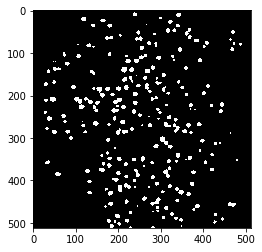

No. frames =  3000
Seconds elapsed =  108.468763828


In [14]:
# How fast are predictions? Delete the hdf5 dataset before making predictions.
# 3000 frames in ~110 seconds -> ~1600 frames / minute.
from time import time
from os import remove, environ
environ['CUDA_VISIBLE_DEVICES'] = "2"
from deepcalcium.models.neurons.unet_2d_summary import UNet2DSummary

tic = time()
remove('/home/kzh/.deep-calcium-datasets/neurofinder.00.00.test/sequence.hdf5')
S, _ = nf_load_hdf5('neurofinder.00.00.test')
model = UNet2DSummary(cpdir='/home/kzh/tmp/')
wpath = '../checkpoints/unet_2d_summary_96x96_nf_0.5089/weights_val_dice_squared.hdf5'
Mp = model.predict(S, weights_path=wpath, save=True)
plt.imshow(imread('/home/kzh/tmp/neurofinder.00.00.test_mp.png'), cmap='gray')
plt.show()
print('No. frames = ', S[0].get('s').shape[0])
print('Seconds elapsed = ', time() - tic)

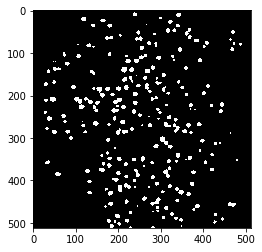